<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data-and-Create-ICA_DATA-Object" data-toc-modified-id="Import-Data-and-Create-ICA_DATA-Object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data and Create ICA_DATA Object</a></span><ul class="toc-item"><li><span><a href="#Rename-iModulons" data-toc-modified-id="Rename-iModulons-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rename iModulons</a></span></li></ul></li><li><span><a href="#Activity-Clustermaps" data-toc-modified-id="Activity-Clustermaps-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Activity Clustermaps</a></span><ul class="toc-item"><li><span><a href="#Pearson-Clustering" data-toc-modified-id="Pearson-Clustering-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pearson Clustering</a></span></li><li><span><a href="#Mutual-Info-Clustering" data-toc-modified-id="Mutual-Info-Clustering-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mutual Info Clustering</a></span></li></ul></li></ul></div>

In [1]:
from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data and Create ICA_DATA Object

In [2]:
interim = "../data/interim/ica_runs/180/"
processed = "../data/processed_data/"

ica_data = IcaData(interim+"S.csv",interim+"A.csv", X=processed+"log_tpm_norm.csv",
                  sample_table=processed+"metadata_final.csv", trn = processed+"TRN.csv",
                   gene_table=processed+"gene_info.csv")


## Rename iModulons

In [4]:
comp_names = list(pd.read_csv(processed+"iModulon_names.csv",index_col=0).index)

rename = {}

for old,new in zip(range(0,80),comp_names):
    rename.update({old:new})

ica_data.rename_imodulons(rename)

ica_data.change_threshold("Central Carbon Metabolism",.05)
ica_data.change_threshold("Peptidoglycan Biosynthesis",.06)


ica_data.A.head()

,SRX3995807,SRX3995806,SRX3995809,SRX3995808,SRX4619048,SRX4619047,SRX4619049,SRX4619050,SRX3995804,SRX3995805,...,SRX4498326,SRX4498328,SRX4498330,SRX4498336,SRX4498333,SRX4498338,SRX4498329,SRX4498325,SRX4498327,SRX4498331
SigH,2.233529,1.747683,1.950159,1.272614,2.236327,1.461665,1.721740,1.716646,0.199084,-0.199084,...,-0.073048,-0.089859,-0.056653,0.272666,0.561386,0.565625,0.928080,0.692540,0.989420,0.978320
Polyketide Synthase Complex,-1.006571,-1.096669,-1.035640,-1.020379,-1.284973,-1.032381,-0.228997,-0.436043,-0.339446,0.339446,...,-0.060317,0.071409,0.197522,4.220594,4.335245,4.791054,2.873865,3.053068,3.106209,2.544357
IniR,-1.633546,-1.525702,-0.973362,-0.412119,-1.575615,-0.661602,-0.413391,-1.286532,-0.227573,0.227573,...,-0.082660,-0.249290,0.542238,-1.337300,-1.332386,-0.657241,-1.025463,-0.751884,-0.543233,-0.929784
PyrR,0.724746,0.685656,0.463208,0.779347,0.891500,0.706596,1.367180,1.396856,0.426180,-0.426180,...,0.094624,0.297912,-0.241379,1.186755,0.660442,0.640216,1.951114,2.235133,2.241501,1.747601
WhiB4,-0.187071,0.778767,-0.132223,0.820021,0.097570,1.035989,1.112930,0.707870,0.450103,-0.450103,...,-0.196057,-0.186073,0.212741,1.362617,1.387968,1.945811,1.459615,2.011044,1.298987,1.454773


# Activity Clustermaps

## Pearson Clustering

<AxesSubplot:>

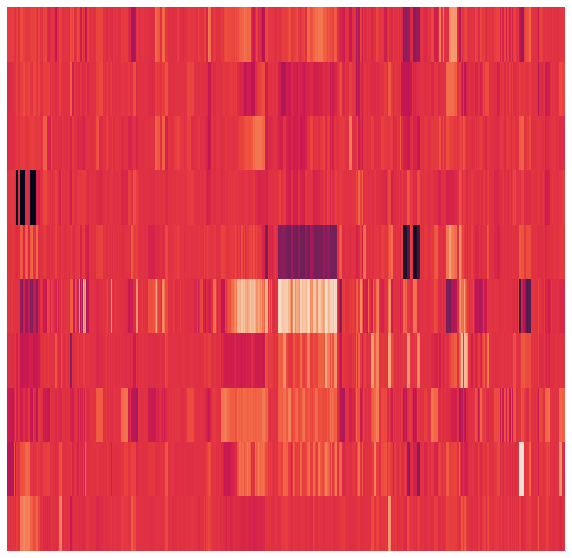

In [5]:
plt.subplots(figsize=[10,10])
sns.heatmap(ica_data.A.iloc[0:10][0:10],cbar=False,xticklabels="",yticklabels="")
#plt.savefig("../figures/interim_figures/sample_heatmap.svg",transparent=True)

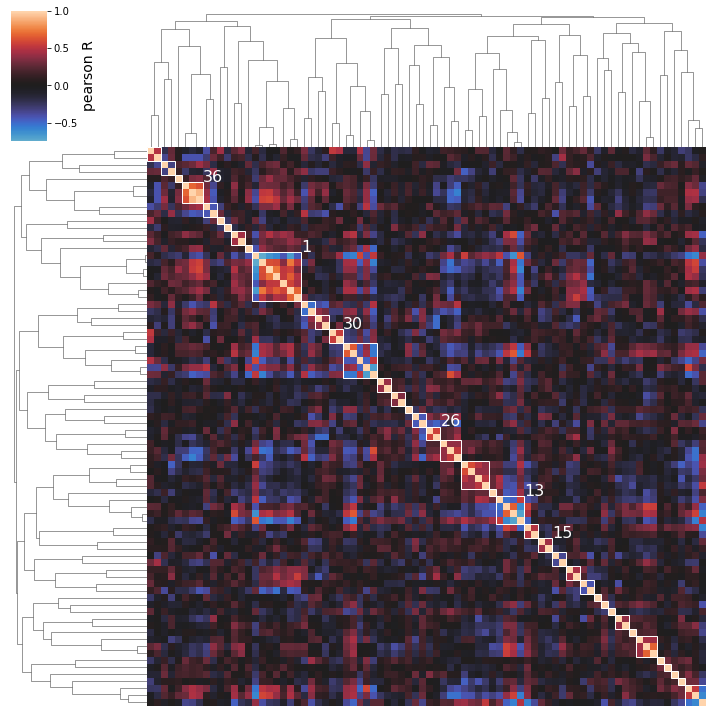

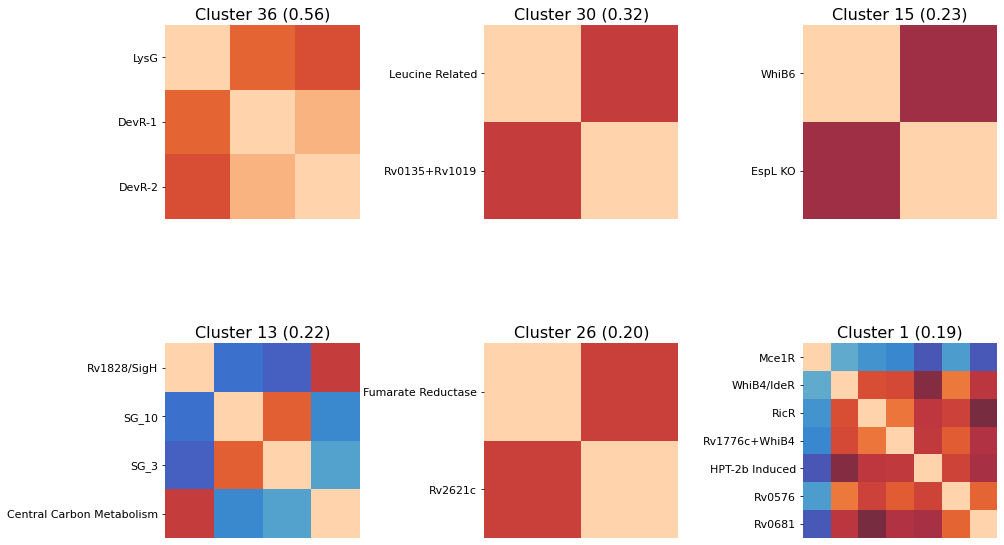

In [6]:
cluster = cluster_activities(ica_data,show_best_clusters=True,correlation_method='pearson',
                             return_clustermap = True,n_best_clusters=6)

## Mutual Info Clustering

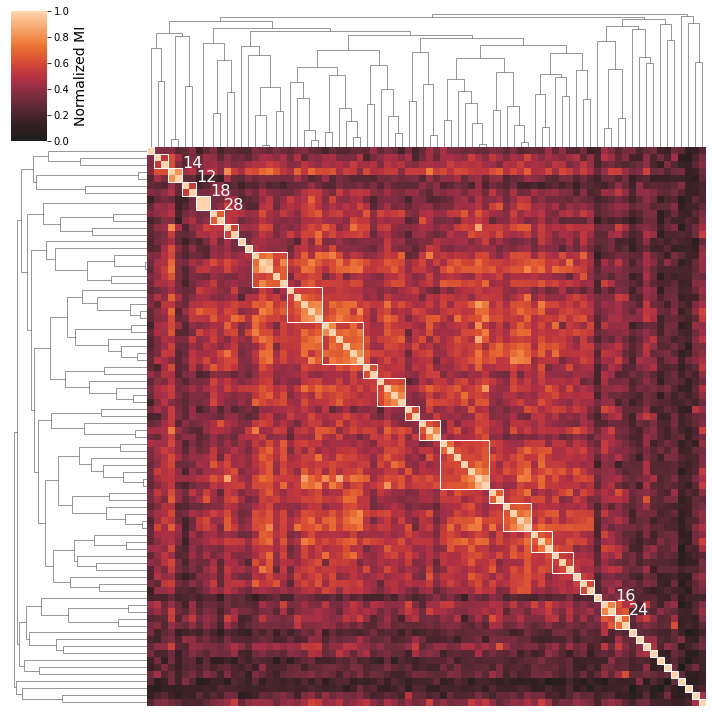

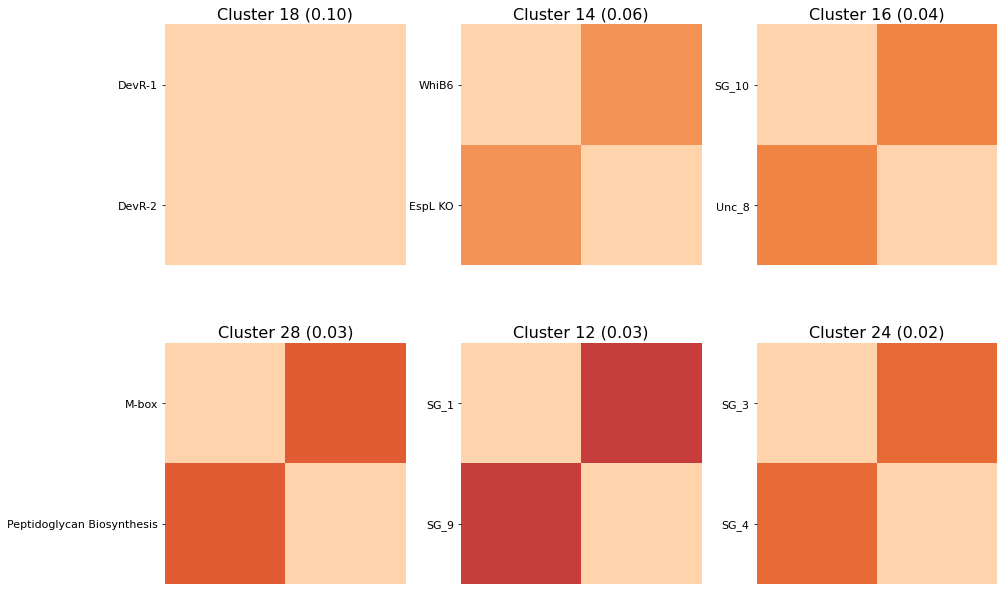

In [7]:
cluster = cluster_activities(ica_data,show_best_clusters=True,correlation_method='mutual_info', 
                             distance_threshold = .9, return_clustermap = True, n_best_clusters=6, 
                             show_thresholding = True)

# Activity Comparison

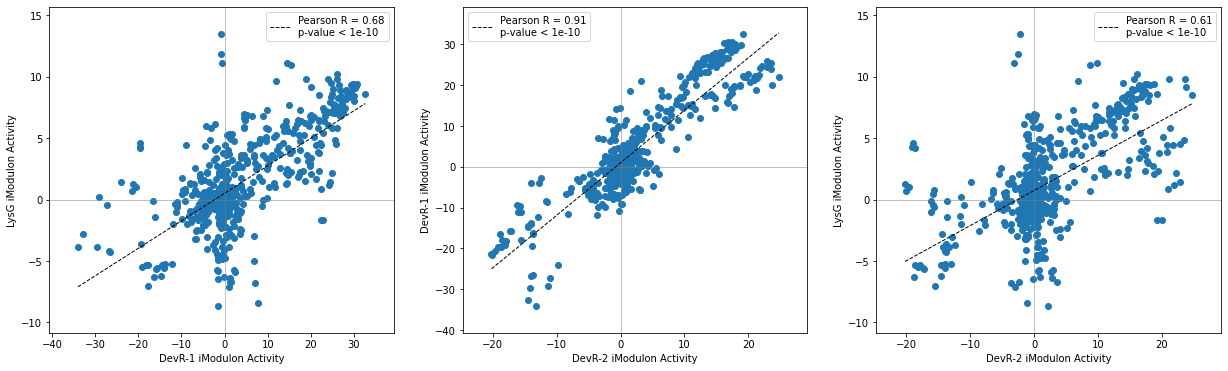

In [14]:
fig,ax = plt.subplots(1,3,figsize=[21,6])
compare_activities(ica_data,"DevR-1","LysG",ax=ax[0])
compare_activities(ica_data,"DevR-2","DevR-1",ax=ax[1])
compare_activities(ica_data,"DevR-2","LysG",ax=ax[2])
plt.savefig("../figures/interim_figures/Hypoxia_response_compare.svg",transparent=True)

C:\Users\reoyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


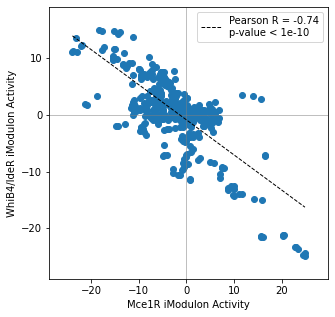

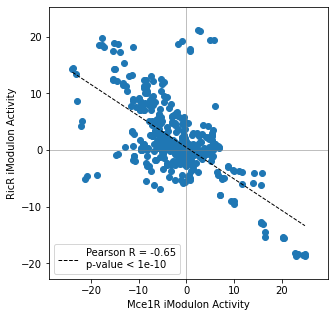

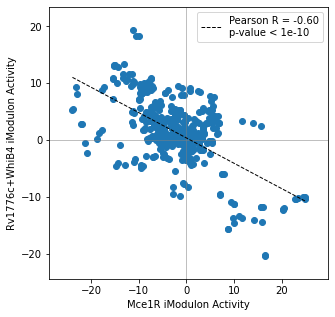

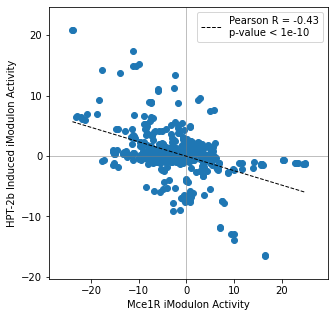

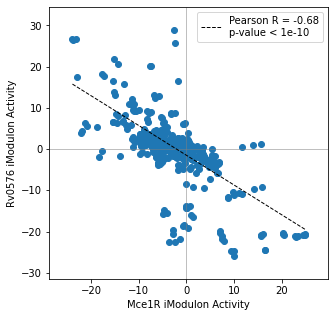

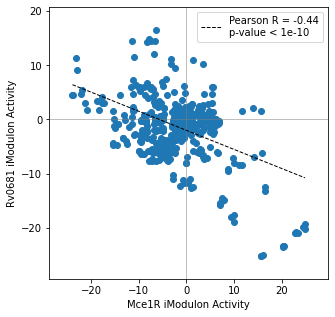

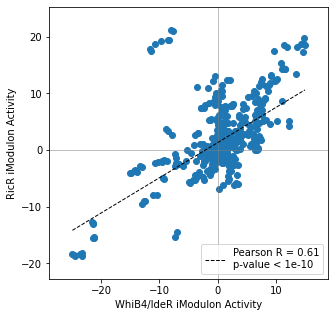

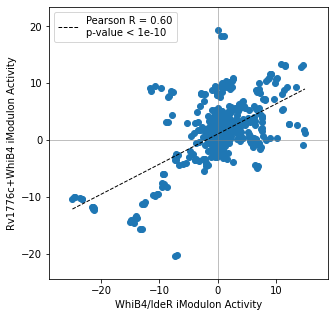

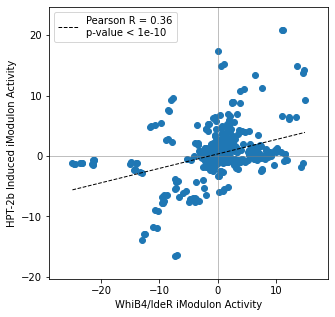

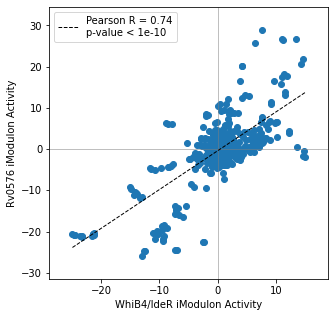

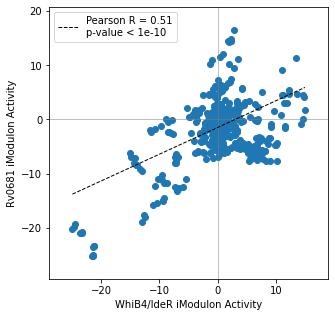

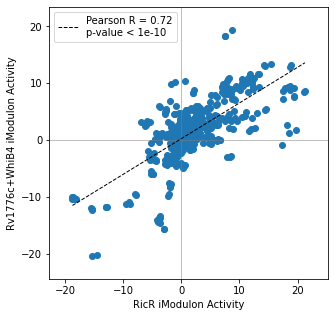

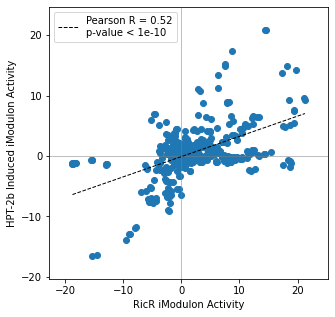

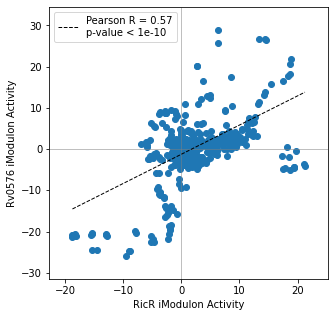

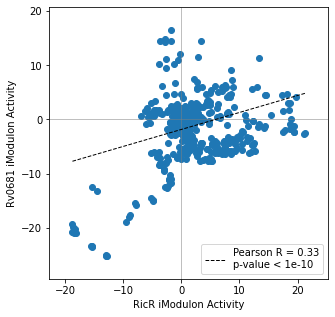

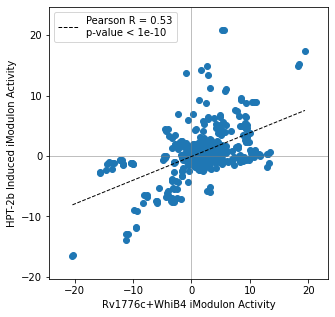

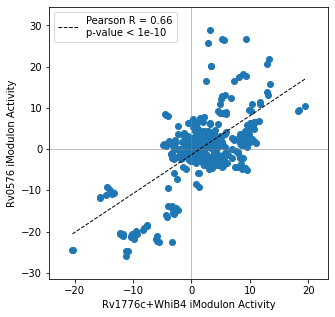

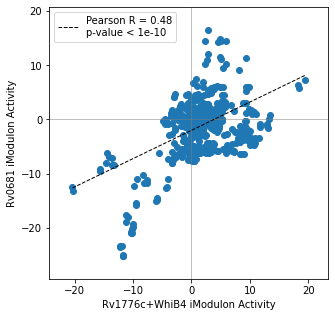

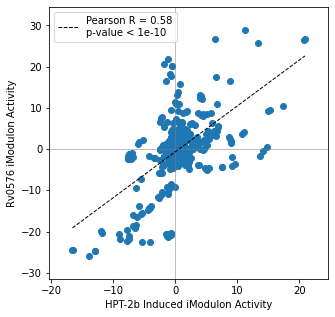

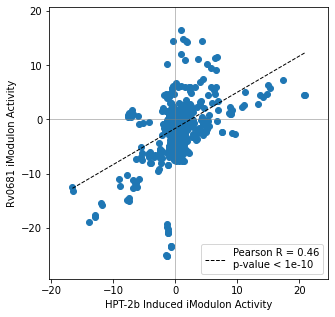

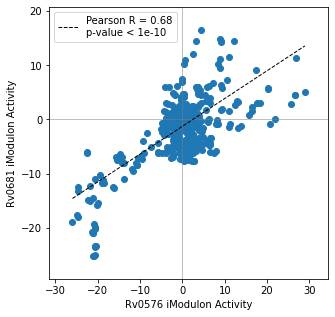

In [9]:
from itertools import combinations
core_response_imod = ["Mce1R","WhiB4/IdeR","RicR","Rv1776c+WhiB4","HPT-2b Induced","Rv0576","Rv0681"]

for i,j in combinations(core_response_imod,2):
    fig,ax = plt.subplots(figsize=[5,5])
    compare_activities(ica_data,i,j,ax=ax)
    if i == "WhiB4/IdeR":
        i = "WhiB4_IdeR"
    if j == "WhiB4/IdeR":
        j = "WhiB4_IdeR"
    plt.savefig("../figures/interim_figures/core_stress_response/"+i+"_"+j+".svg",transparent=True)